In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# P7.18

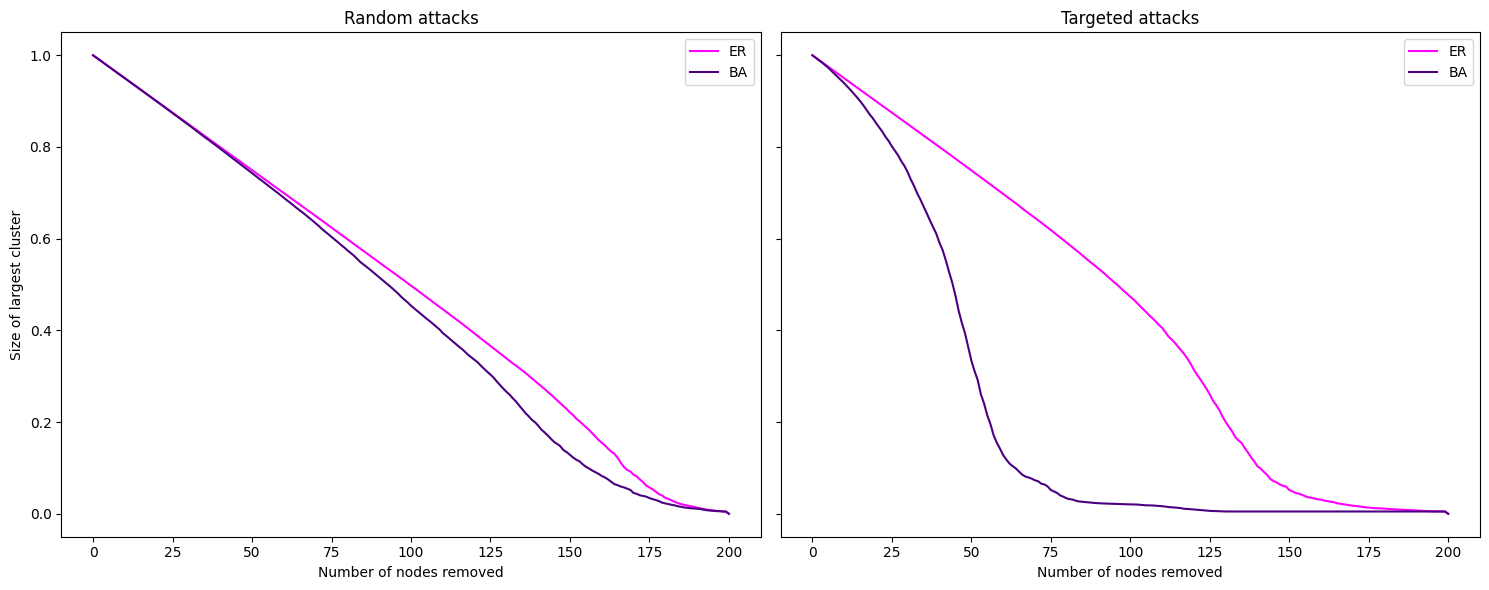

In [ ]:
n = 200  
p = 0.05  # prob for ER
m = 3  # edges for BA
simulations = 50  

def largest_component_size(graph):
    if len(graph) == 0:
        return 0
    return len(max(nx.connected_components(graph), key=len)) / n


def simulate(graph_type, attack_type):
    results = []
    for _ in range(simulations):
        if graph_type == "ER":
            graph = nx.erdos_renyi_graph(n, p)
        elif graph_type == "BA":
            graph = nx.barabasi_albert_graph(n, m)
        
        original_size = largest_component_size(graph)
        sizes = [original_size]
        
        if attack_type == "random":
            nodes = list(graph.nodes())
            np.random.shuffle(nodes)  
        elif attack_type == "targeted":
            nodes = sorted(graph.degree, key=lambda x: x[1], reverse=True)  
            nodes = [node for node, _ in nodes]
        
        for node in nodes:
            graph.remove_node(node)
            sizes.append(largest_component_size(graph))
        
        results.append(sizes)
    
    return np.mean(results, axis=0)

x = np.arange(n + 1) 

er_random = simulate("ER", "random")
ba_random = simulate("BA", "random")

er_targeted = simulate("ER", "targeted")
ba_targeted = simulate("BA", "targeted")

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Random attacks
axes[0].plot(x, er_random, label="ER", color='fuchsia')
axes[0].plot(x, ba_random, label="BA", color='indigo')
axes[0].set_title("Random attacks")
axes[0].set_xlabel("Number of nodes removed")
axes[0].set_ylabel("Size of largest cluster")
axes[0].legend()

# Targeted attacks
axes[1].plot(x, er_targeted, label="ER", color='fuchsia')
axes[1].plot(x, ba_targeted, label="BA", color='indigo')
axes[1].set_title("Targeted attacks")
axes[1].set_xlabel("Number of nodes removed")
axes[1].legend()

plt.tight_layout()
plt.show()


# P7.19

BA graph is characterized by a powerlaw degree distribution with a few "hub" nodes having significantly more connections. Even under random failure, there is a chance of removing one of these hubs, which can fragment the network more quickly. \
ER graph's normal degree distribution means that removing the highest-degree nodes does not drastically impact overall connectivity, preserving the largest cluster longer. 

# P7.7

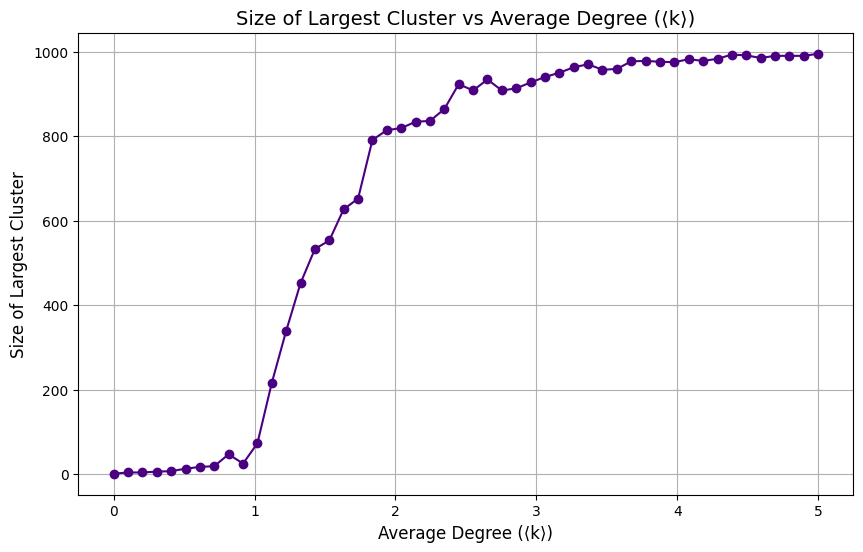

In [25]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


N = 1000 
k_values = np.linspace(0, 5, 50)  

largest_clusters = []


for k in k_values:
    p = k / N  
    G = nx.erdos_renyi_graph(N, p)  
    
    largest_cluster_size = len(max(nx.connected_components(G), key=len))
    largest_clusters.append(largest_cluster_size)

plt.figure(figsize=(10, 6))
plt.plot(k_values, largest_clusters, marker='o', linestyle='-', color='indigo')
plt.title("Size of Largest Cluster vs Average Degree (⟨k⟩)", fontsize=14)
plt.xlabel("Average Degree (⟨k⟩)", fontsize=12)
plt.ylabel("Size of Largest Cluster", fontsize=12)
plt.grid(True)
plt.show()
